In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [2]:
FOLDER_PATH = "D:\\Google Drive\\Catherning Folder\\THU\\Thesis\\Recipe datasets\\scirep-cuisines-detail"
FILES = ["cleaned_data.pkl","full_data.pkl"]

In [3]:
df_train=pd.read_pickle(os.path.join(FOLDER_PATH,FILES[1]))
df_train=df_train.reset_index()
df_train

,index,cuisine,id,ingredients,all_ingredients
0,0,Canada,0,"[egg, yeast, wheat, milk, lard]",egg;yeast;wheat;milk;lard
1,1,Canada,1,"[pork, carrot, pea, onion, potato]",pork;carrot;pea;onion;potato
2,2,Canada,2,[maple_syrup],maple_syrup
3,3,Canada,3,"[wheat, yeast, almond, honey, oat, date, veget...",wheat;yeast;almond;honey;oat;date;vegetable_oi...
4,4,Canada,4,"[butter, lovage, clam, wheat, onion, thyme, po...",butter;lovage;clam;wheat;onion;thyme;potato;ye...
...,...,...,...,...,...
57686,57686,Italian,2453,"[kiwi, olive_oil, clam, white_wine, orange, sa...",kiwi;olive_oil;clam;white_wine;orange;salmon;f...
57687,57687,Italian,2454,"[tomato, butter, beef, onion, red_wine, black_...",tomato;butter;beef;onion;red_wine;black_pepper...
57688,57688,Italian,2455,"[vegetable, wheat, egg, cheese, olive_oil]",vegetable;wheat;egg;cheese;olive_oil
57689,57689,Italian,2456,"[tomato, clam, black_pepper, parsley, celery, ...",tomato;clam;black_pepper;parsley;celery;macaroni


# Data analysis

American                 40150
Italian                   3250
Mexican                   2390
French                    1264
Asian                     1176
east_asian                 951
Korean                     799
Canada                     774
Indian                     598
western                    450
Chinese                    442
Eastern-Europe             381
Spanish_Portuguese         366
Southern_SoulFood          346
Jewish                     329
Japanese                   320
Mediterranean              289
Germany                    289
Thai                       289
UK-and-Ireland             282
Scandinavian               250
MiddleEastern              248
Central_SouthAmerican      241
Greek                      225
English_Scottish           204
Caribbean                  183
Cajun_Creole               146
Moroccan                   137
African                    115
Southwestern               108
South-America              103
Vietnamese                  95
Irish   

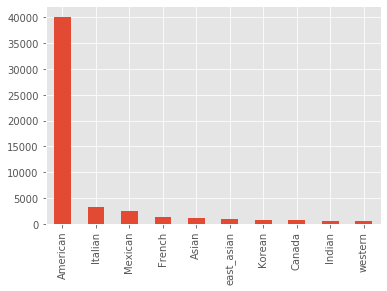

In [4]:
%matplotlib inline

plt.style.use('ggplot')
df_train['cuisine'].value_counts().head(10).plot(kind='bar')

df_train['cuisine'].value_counts()

Results are worse when we remove American recipes!
Check what exactly are those results
See if we should remove american, if yes, how to improve score ???

### Counter for ingredients

In [5]:
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [6]:
counters['French'].most_common(10)

[('butter', 633),
 ('egg', 558),
 ('wheat', 472),
 ('olive_oil', 353),
 ('cream', 347),
 ('garlic', 335),
 ('onion', 323),
 ('milk', 260),
 ('black_pepper', 259),
 ('parsley', 237)]

In [7]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
Canada,wheat,butter,egg,onion,garlic,milk,black_pepper,cane_molasses,vegetable_oil,pepper
Turkey,garlic,onion,tomato,butter,wheat,yogurt,olive_oil,bell_pepper,pepper,egg
Caribbean,onion,garlic,vegetable_oil,black_pepper,tomato,olive_oil,pepper,cayenne,bell_pepper,chicken
Bangladesh,onion,cayenne,vegetable_oil,turmeric,garlic,cilantro,coriander,beef,potato,cardamom
Indian,cumin,turmeric,onion,coriander,cayenne,garlic,ginger,vegetable_oil,pepper,fenugreek
French,butter,egg,wheat,olive_oil,cream,garlic,onion,milk,black_pepper,parsley
Italian,olive_oil,garlic,tomato,onion,basil,parmesan_cheese,macaroni,egg,butter,black_pepper
Jewish,egg,wheat,butter,onion,vegetable_oil,olive_oil,black_pepper,cinnamon,garlic,lemon_juice
Korean,garlic,scallion,cayenne,soy_sauce,sesame_oil,black_pepper,rice,soybean,roasted_sesame_seed,vegetable
Iran,onion,tomato,yogurt,black_pepper,garlic,cardamom,olive_oil,walnut,vegetable_oil,dill


In [8]:
df_train['all_ingredients'] = df_train['ingredients'].map(";".join)
df_train.head()

,index,cuisine,id,ingredients,all_ingredients
0,0,Canada,0,"[egg, yeast, wheat, milk, lard]",egg;yeast;wheat;milk;lard
1,1,Canada,1,"[pork, carrot, pea, onion, potato]",pork;carrot;pea;onion;potato
2,2,Canada,2,[maple_syrup],maple_syrup
3,3,Canada,3,"[wheat, yeast, almond, honey, oat, date, veget...",wheat;yeast;almond;honey;oat;date;vegetable_oi...
4,4,Canada,4,"[butter, lovage, clam, wheat, onion, thyme, po...",butter;lovage;clam;wheat;onion;thyme;potato;ye...


In [9]:
df_train['all_ingredients'].str.contains('garlic').value_counts()

False    40226
True     17465
Name: all_ingredients, dtype: int64

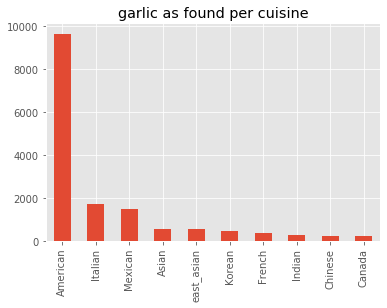

In [10]:
indices = df_train['all_ingredients'].str.contains('garlic')
df_train[indices]['cuisine'].value_counts().head(10).plot(kind='bar',
                                                 title='garlic as found per cuisine')

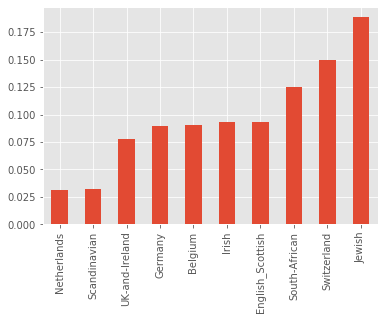

In [11]:
relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
relative_freq.sort_values(inplace=True)
relative_freq.head(10).plot(kind='bar')

In [12]:
unique = np.unique(top10.values.ravel())
unique.shape

(73,)

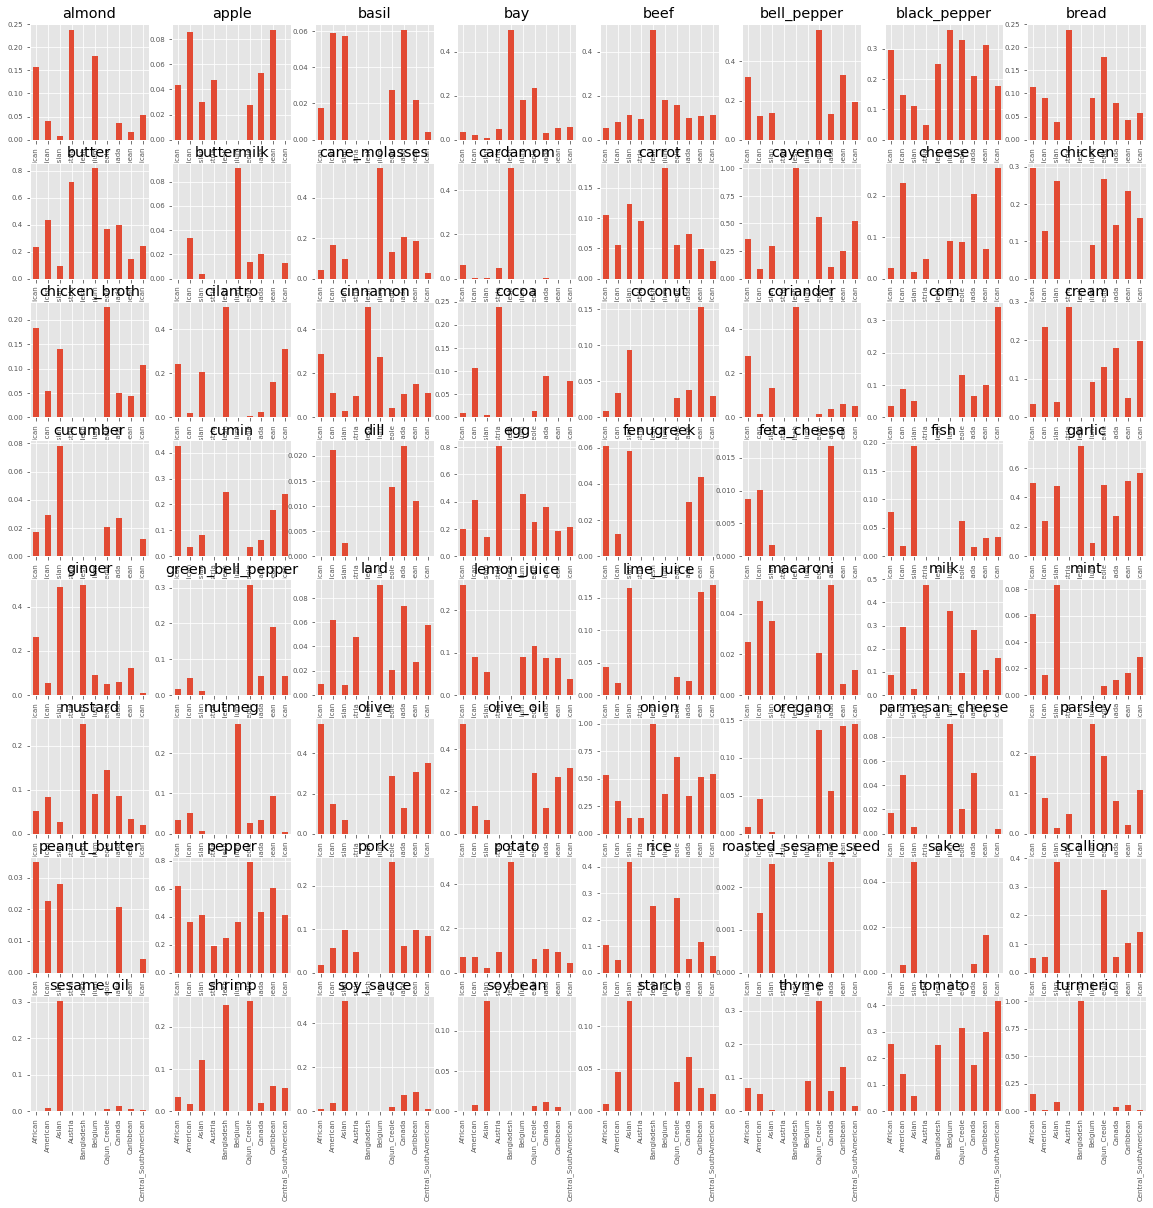

In [13]:
# spot ingredients which have a high degree of uniqueness

fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = df_train['all_ingredients'].str.contains(ingredient)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    relative_freq.head(10).plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)